# Introduction to Data Science
## Homework 3 

Student Name: Xiang Wang

Student Netid: xw1173
***

### Part 1
1\. Label each case as describing either data mining `(DM)`, or the use of the results of data mining `(USE)`.  [Replace `(ANS)` below.]

a) `(USE)` Choose customers who are most likely to respond to an on-line ad.

b) `(DM)` Discover rules that indicate when an account has been defrauded.

c) `(DM)` Find patterns indicating what customer behavior is more likely to lead to response to an on-line ad.

d) `(USE)` Estimate probability of default for a credit application.

e) `(USE)` Predict whether a customer is pregnant

2\. Plumbing Inc. has been selling plumbing supplies for the last 20 years. The owner, Joe, decides that next year it is finally time to diversify by adding gardening tools to his products. Having had success using customer data to build predictive models to guide direct mail campaigns for special plumbing offers, he considers that data mining could help him to identify a subset of customers who should be good prospects for his new set of products. Is Joe ready to solve this as a supervised learning problem? What would you suggest as the target variable?  Be precise. Is there anything else that you would recommend that Joe do to achieve his business goal?

Answer:
    I think Joe may not be ready to solve it yet if he does not have the labled training data, while I do think he may have clients' related features like :
    1. Different kinds of plumbing supplies that are related to garden?
    2. Location / Acceptable price level / Total purchase amount / rate of taking mail offer etc.
    yet he may miss the training data on the target variable, which may be the likelyhood of buying gardening tools (through mailing offers maybe). 
    
    I would recomment him to first do some data preparation by mailing special gardening tools offer(which should have product good enough and price low enough to attract any client having garden using gardening tools) to a subset of his past clients and collect the result on which clients do take the offer as labeled data.
    

### Part 2
This is a hands-on task where we build a tree-structured predictive model as discussed in class and in the book. For this part, we will be using the data in `data/cell2cell_data_80_percent.csv`.

These historical data consist of 31,892 customers: 15,855 customers that churned (i.e., left the company) and 16,036 that did not churn (see the `"churndep"` variable). Here are the data set's 11 attributes describing the customers: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the target variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 


**Don't forget to exclude the target variable `"churndep"` when fitting your models. You don't want to include the target when fitting!!!**

1\. Load the data into a pandas `DataFrame()`.

In [1]:
import pandas as pd

data = pd.read_csv('data/cell2cell_data_80_percent.csv')
target = data['churndep']
feature_data = data.drop('churndep', axis=1)

2\. Using the following two functions for Entropy and Information Gain (don't forget to run this cell!), figure out what is the maximum information gain for each feature. Make a bar plot with feature names along the x-axis and maximum information gain on the y-axis. Which feature gives the largest information gain? Don't forget that some of the features are binary.

In [2]:
import numpy as np
import math

def entropy(target):
    '''
        Computes the entropy for a set of instances (that's needed is the values of the target variable)
        Presumes the target values are class indexes -- integers
        Thus, target is an array of integers
    '''
    # Get the number of instances
    n = len(target)
    # Count how frequently each unique target value occurs using the numpy function 
    counts = np.bincount(target).astype(float)
    # Initialize entropy
    entropy = 0
    
    # Otherwise, for each possible value, update entropy; use zero for 0 log 0
    for count in counts:
        if count == 0:
            entropy += 0
        else:
            entropy += math.log(count/n, 2) * count/n
    # Return entropy
    return -1 * entropy


def information_gain(feature, threshold, target):
    '''
    This function takes three things:
    feature - A list of all the values this feature takes on, in some instance order, e.g. data['revenue']
    threshold - A number at which to threshold a continuous variable, e.g. 1.2
    target - A list of all the target values, in the same order as feature, e.g. data['churndep']
    '''
    # Using numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
    # Record if each feature value is above the threshold
    feature = (feature <= threshold)
    # Initialize information gain with the parent entropy
    ig = entropy(target)
    # For each side of the threshold, update the information gain
    for level, count in zip([0, 1], np.bincount(feature).astype(float)):
        ig -= count/len(feature) * entropy(target[feature == level])
    # Return information gain
    return ig


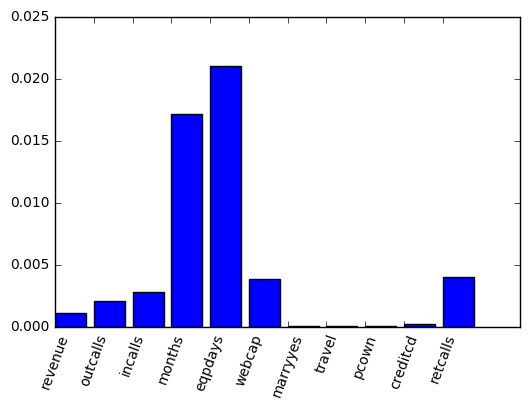

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

features = []
thresholds = []
igs = []
is_binary = set(["marryyes", "travel", "pcown", "creditcd", "webcap"])

for feature in feature_data: #['revenue']:
    features.append(feature)
    f_value = feature_data[feature]
    minValue = f_value.min()
    maxValue = f_value.max()
    ig = 0
    threshold = 0
    if feature in is_binary:
        # consider binary value
        ig0 = information_gain(f_value, minValue, target)
        ig1 = information_gain(f_value, maxValue, target)
        if ig0 > ig1:
            ig = ig0
            threshold = minValue
        else:
            ig = ig1
            threshold = maxValue
    else:
        for value in np.arange(minValue, maxValue + 0.1, 0.1): # 0.01 will be not too slow
            ig0 = information_gain(f_value, value, target)
            if ig0 > ig:
                ig = ig0
                threshold = value
    igs.append(ig)
    thresholds.append(threshold)

# Use the lists we created to plot

plt.bar(range(len(features)), igs)
plt.xticks(range(len(features)), features, rotation=70)
plt.show()


3\. Is the relationship between the top 3 most important features negative or positive? If your boss asked you to "explain the top 3 drivers of churn," how would you interpret the relationship between these 3 features and the churn outcome that you find in these results?  

What "real-life" connection can you draw between each variable and churn?


In [4]:
df = pd.DataFrame([features, igs, thresholds])
df

,0,1,2,3,4,5,6,7,8,9,10
0,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls
1,0.00110863,0.00209476,0.00279267,0.0171475,0.0210688,0.00389517,6.03398e-05,4.22507e-05,3.69161e-05,0.00025333,0.00398808
2,32.44,4,0.7,10.1,304.1,0,0,0,0,0,0


**Ans: ** We can see that the top 3 most important features may be "eqpdays", "months", "retcalls"

In [5]:
features_to_check = ["eqpdays", "months", "retcalls"]
num_users = len(feature_data.index)


def churn_info(churn, not_churn):
    return "More churn" if churn > not_churn else "More not churn"

for feature in features_to_check:
    index = features.index(feature)
    threshold = thresholds[index]
    low_churn = 0
    high_churn = 0
    low_not_churn = 0
    high_not_churn = 0
    for i in data.index:
        if data[feature][i] <= threshold:
            if data['churndep'][i]:
                low_churn += 1
            else:
                low_not_churn += 1
        else:
            if data['churndep'][i]:
                high_churn += 1
            else:
                high_not_churn += 1
    print(feature)
    print("Low: " + churn_info(low_churn, low_not_churn))
    print("---------------")
    print("High: " + churn_info(high_churn, high_not_churn))
    print("---------------")

eqpdays
Low: More not churn
---------------
High: More churn
---------------
months
Low: More not churn
---------------
High: More churn
---------------
retcalls
Low: More not churn
---------------
High: More churn
---------------


**Ans: ** We can see that the relationship is positive among all three features (higher churn rate with higher value). 

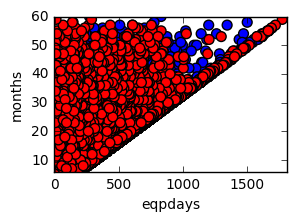

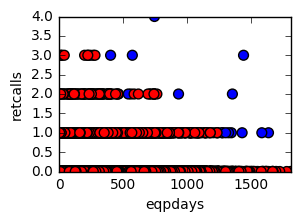

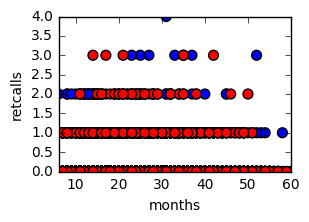

In [6]:
# A function to plot the data
def Plot_Data(data, v1, v2, tv):
    # Make the plot square
    plt.rcParams['figure.figsize'] = [3.0, 2.0]
    
    # Color
    color = ["red" if x == 0 else "blue" for x in data[tv]]
    
    # Plot and label
    plt.scatter(data[v1], data[v2], c=color, s=50)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.xlim([min(data[v1]) , max(data[v1]) ])
    plt.ylim([min(data[v2]) , max(data[v2]) ])
    plt.show()
    
Plot_Data(data, "eqpdays",  "months", "churndep")
Plot_Data(data, "eqpdays",  "retcalls", "churndep")
Plot_Data(data, "months",  "retcalls", "churndep")

**Ans: ** And we can interpret the relationship as: The more the user stays in the using the equipment and service, the more retention calls they made, the more likely they will churn.

4\. Now build and fit a tree-structured model using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) using the 11 attributes to **predict the `"churndep"` target** variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`.  For this assignment, use a moderately shallow tree (e.g., `max_depth=3`). For all other settings you should use the default options (this means you don't have to set anything else).  See the examples from the class notebooks. **Create this model in a variable called: "tree_model"**

**Remember, don't forget to exclude the target variable `"churndep"` when fitting your models. You don't want to fit on the target!!!**

In [7]:
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_model = DecisionTreeClassifier(max_depth=3,criterion="entropy") 
tree_model.fit(feature_data, target)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

5\. Now visualize your tree structure.  Would the data-driven model lead you to change or update any of your interpretations of the relationships between the variables and churn?

(Recall that we visualized a tree in class.  To use that code, you'll need some libraries and the directory you are working in should have an "images" subdirectory, as that is where the tree image is stored by the code.  Also, it doesn't work well to visualize a huge tree.)

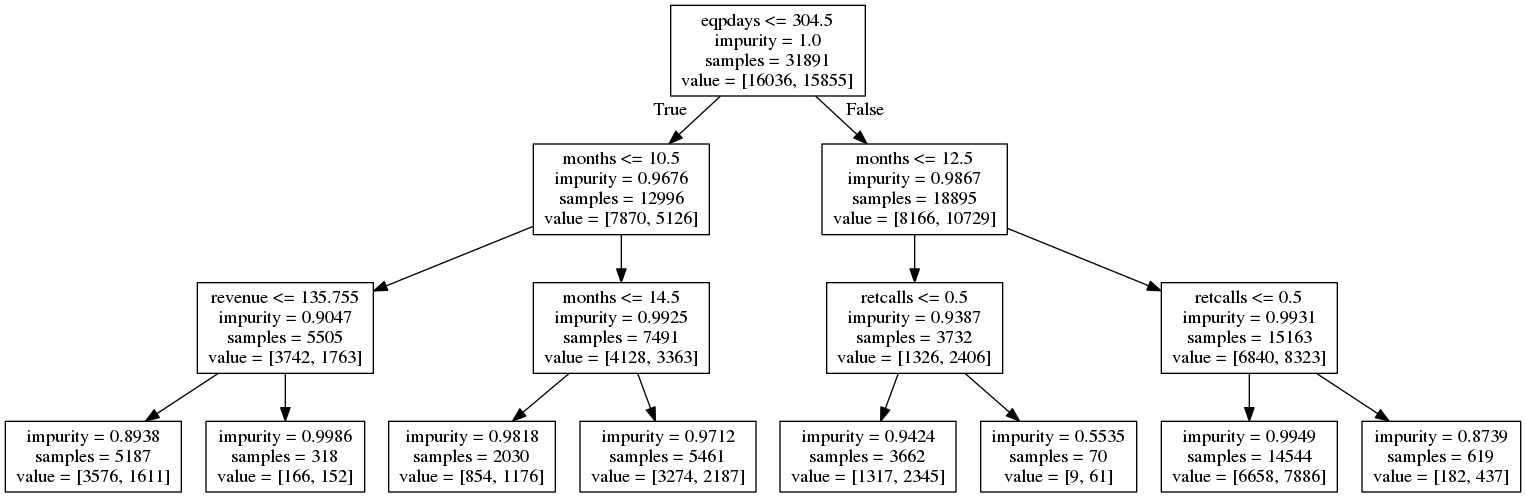

In [8]:
import os
from IPython.display import Image

# A function that gives a visual representation of the decision tree
def Decision_Tree_Image(decision_tree, feature_names, name="temp"):
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree.tree_, out_file='images/' + name + '.dot', feature_names=feature_names)
    # Call graphviz to make an image file from our decision tree
    os.system("dot -T png images/" + name + ".dot -o images/" + name + ".png")
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')



# YOU SHOULD HAVE CREATED TREE_MODEL AND DATA VARIABLES BEFORE !!!!

Decision_Tree_Image(tree_model, feature_data.columns)



** Ans: ** It does not change the interpretation as higher eqpdays/months/retcalls will result in higher churn rate

6\. Load in another data set `data/cell2cell_data_20_percent.csv`. This data is of the same format as the other file we read in. Using the classifier built and fit above, predict `"churndep"` on the original data and the new data that you just loaded in. How well does it predict? (I.e., what is the accuracy on each data set?)

In [9]:
import pandas as pd
from sklearn import metrics


data_new = pd.read_csv('data/cell2cell_data_20_percent.csv')
target_new = data_new['churndep']
feature_data_new = data_new.drop('churndep', axis=1)

tree_data_accuracy = metrics.accuracy_score(tree_model.predict(feature_data), target)
tree_new_data_accuracy = metrics.accuracy_score(tree_model.predict(feature_data_new), target_new)


# This line will be used for grading. DO NOT REMOVE IT. Make sure it prints out the correct value!!!
print ("Data and data_new accuracy = %.4f and %.4f" % (tree_data_accuracy, tree_new_data_accuracy))


Data and data_new accuracy = 0.5933 and 0.5894


7\. Create your own training/test split.  First use pandas to create one unique data frame **combining** the 80_percent and the 20_percent dataframes. 

Then, write the code to split that data frame into 2 new, random samples **without replacement**. You should have at the end a new random data frame called "train_df" with 80% of the data and another dataframe called "test_df" including the rest (20%) of the data. You may use any `random` function from numpy that suits, but **DO NOT** use functions from sklearn.

In [10]:
# Set randomness if you want to test it with the same answer

import numpy as np
np.random.seed(841)
from sklearn.model_selection import train_test_split

frames = [data, data_new]

data_combined = pd.concat(frames)

feature_data_combined = data_combined.drop('churndep', axis=1)
target_combined = data_combined['churndep']

# Split the data into train and test pieces for both X and Y
feature_data_train, feature_data_test, target_train, target_test = train_test_split(feature_data_combined, target_combined, train_size=0.80)


# DON'T FORGET TO LOOK AT THE SIZE OF YOUR COMBINED DATA FRAME  
# YOU CAN USE THE FUNCTION "SHAPE" FOR THIS:  PRINT ( MY_DATAFRAME_COMBINED.SHAPE )

8\. From the new train/test split, what is the generalization accuracy of a learned classification tree? 

In [11]:
tree_model_combined = DecisionTreeClassifier(max_depth=3,criterion="entropy")
tree_model_combined.fit(feature_data_train, target_train)

new_tree_train_accuracy = metrics.accuracy_score(tree_model_combined.predict(feature_data_train), target_train)
new_tree_test_accuracy = metrics.accuracy_score(tree_model_combined.predict(feature_data_test), target_test)


# This line will be used for grading. DO NOT REMOVE IT. Make sure it prints out the correct value!!!
print ("Train_df and test_df accuracy (my split) = %.4f and %.4f" % (new_tree_train_accuracy, new_tree_test_accuracy))


Train_df and test_df accuracy (my split) = 0.5914 and 0.5983


### Part 3

The options we chose for your tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `max_depth`, `min_samples_split`, and `min_samples_leaf`:

1\. Generate a range of 10 values of each that make sense to test (To select these numbers: Think about the number of observations that you have)

[ Hint: exponentially increasing values for the parameters is a good approach ]

In [12]:
class DecisionTreeParams:
    
    def __init__(self, data):
        self.min_samples_split_values = []
        self.min_samples_leaf_values = []
        self.max_depth_values = []
        total = len(data.index)
        depth = 1
        for i in range(0, 10):
            self.min_samples_split_values.append(total)
            self.max_depth_values.append(depth)
            total = (total + 1) // 2
            self.min_samples_leaf_values.append(total)
            depth += 1

data_params = DecisionTreeParams(data)

2\. For the values of `max_depth`, `min_samples_split`, and `min_samples_leaf` you chose in 3.1 build a new decision tree classifier **(on the *original* data we read in, stored in _`data`_ with the CSV information)** and record the classifier's accuracy ON both, the original train (data) and test (data\_new). You should now generate three plots, each with 10 points for the original data and 10 points for the new data. The values you chose are on the x-axis, the accuracies you calculated are on the y-axis, and there will be two lines/curves per plot (one for `data` and the other for `data_new`).

[Hint: for `min_samples_split` and `min_samples_leaf` you may want to visualize your plot with a **log scale** on the x-axis.  Also note that the fitting curve will be "backwards" for those two parameters, as we would expect more fitting with smaller values.]

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

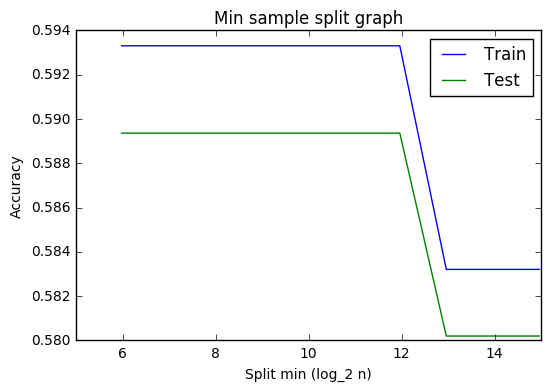

In [14]:
# MIN SAMPLES SPLIT GRAPH

accuracies = []
accuracies_new = []

for split_value in data_params.min_samples_split_values:
    tree_model_temp = DecisionTreeClassifier(max_depth=3,criterion="entropy", min_samples_split=split_value)
    tree_model_temp.fit(feature_data, target)
    accuracies.append(metrics.accuracy_score(tree_model_temp.predict(feature_data), target))
    accuracies_new.append(metrics.accuracy_score(tree_model_temp.predict(feature_data_new), target_new))
    
log_values = [math.log(i, 2.0) for i in data_params.min_samples_split_values]

plt.plot(log_values, accuracies, label="Train")
plt.plot(log_values, accuracies_new, label="Test")
plt.title("Min sample split graph")
plt.xlabel("Split min (log_2 n)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


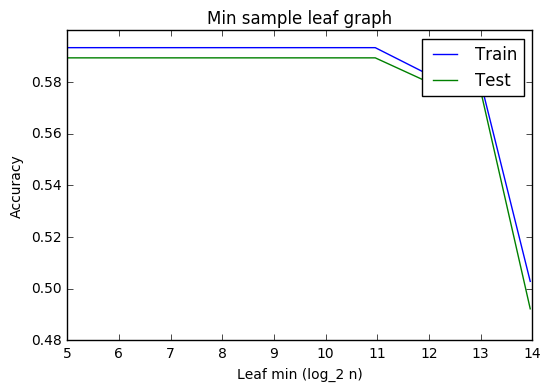

In [15]:
# MIN SAMPLES LEAF GRAPH

accuracies = []
accuracies_new = []

for leaf_value in data_params.min_samples_leaf_values:
    tree_model_temp = DecisionTreeClassifier(max_depth=3,criterion="entropy", min_samples_leaf=leaf_value)
    tree_model_temp.fit(feature_data, target)
    accuracies.append(metrics.accuracy_score(tree_model_temp.predict(feature_data), target))
    accuracies_new.append(metrics.accuracy_score(tree_model_temp.predict(feature_data_new), target_new))
    
log_values = [math.log(i, 2.0) for i in data_params.min_samples_leaf_values]

plt.plot(log_values, accuracies, label="Train")
plt.plot(log_values, accuracies_new, label="Test")
plt.title("Min sample leaf graph")
plt.xlabel("Leaf min (log_2 n)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


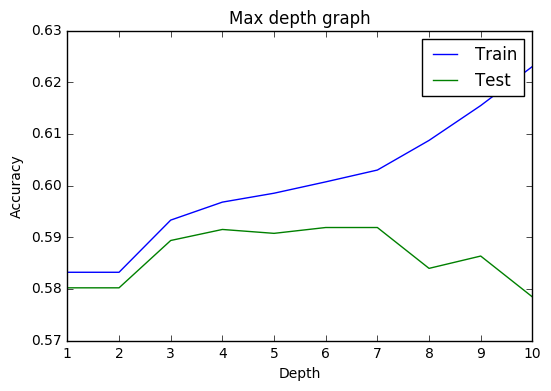

In [16]:
# MAX DEPTH GRAPH


accuracies = []
accuracies_new = []

for depth in data_params.max_depth_values:
    tree_model_temp = DecisionTreeClassifier(max_depth=depth,criterion="entropy")
    tree_model_temp.fit(feature_data, target)
    accuracies.append(metrics.accuracy_score(tree_model_temp.predict(feature_data), target))
    accuracies_new.append(metrics.accuracy_score(tree_model_temp.predict(feature_data_new), target_new))

plt.plot(data_params.max_depth_values, accuracies, label="Train")
plt.plot(data_params.max_depth_values, accuracies_new, label="Test")
plt.title("Max depth graph")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()




3\. Now let's try fitting some linear models: a logistic regression (`sklearn.linear_model.LogisticRegression()`, [manual](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) and SVM (`sklearn.svm.LinearSVC()`, [manual](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)). For each of these models, fit them on the first set of data we read in (the TRAIN which is stored in `data`) and report the accuracy on both sets of data we read first (the train in `data` and the test in `data_new`). 

When fitting each model, you should keep all parameters at their defaults.

In [17]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(feature_data, target)

logistic_regression_original_accuracy = metrics.accuracy_score(logistic_regression_model.predict(feature_data), target)
logistic_regression_new_accuracy = metrics.accuracy_score(logistic_regression_model.predict(feature_data_new), target_new)

tree_data_accuracy = metrics.accuracy_score(tree_model.predict(feature_data), target)
tree_new_data_accuracy = metrics.accuracy_score(tree_model.predict(feature_data_new), target_new)

svm_model = LinearSVC()
svm_model.fit(feature_data, target)

svm_original_accuracy = metrics.accuracy_score(svm_model.predict(feature_data), target)
svm_new_accuracy = metrics.accuracy_score(svm_model.predict(feature_data_new), target_new)



# These lines will be used for grading. DO NOT REMOVE THEM. Make sure they print out the correct values!!!
print ("Original and new logistic regression accuracy = %.4f and %.4f" % (logistic_regression_original_accuracy, logistic_regression_new_accuracy))
print ("Original and new SVM accuracy = %.4f and %.4f" % (svm_original_accuracy, svm_new_accuracy))


Original and new logistic regression accuracy = 0.5618 and 0.5595
Original and new SVM accuracy = 0.5529 and 0.5553


4\. Now, let's compare this results with YOUR **new split created (train_df and test_df)**. 

Fit the same models (logistic regression and SVM) on these random data frames and report the accuracy on both sets (train_df and test_df). When fitting each model, you should keep all parameters as their defaults. 

In [18]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# feature_data_train, feature_data_test, target_train, target_test

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(feature_data_train, target_train)

logistic_regression_original_accuracy = metrics.accuracy_score(logistic_regression_model.predict(feature_data_train), target_train)
logistic_regression_new_accuracy = metrics.accuracy_score(logistic_regression_model.predict(feature_data_test), target_test)

svm_model = LinearSVC()
svm_model.fit(feature_data_train, target_train)

svm_original_accuracy = metrics.accuracy_score(svm_model.predict(feature_data_train), target_train)
svm_new_accuracy = metrics.accuracy_score(svm_model.predict(feature_data_test), target_test)



# These lines will be used for grading. DO NOT REMOVE THEM. Make sure they print out the correct values!!!
print ("Original and new logistic regression accuracy = %.4f and %.4f" % (logistic_regression_original_accuracy, logistic_regression_new_accuracy))
print ("Original and new SVM accuracy = %.4f and %.4f" % (svm_original_accuracy, svm_new_accuracy))


Original and new logistic regression accuracy = 0.5620 and 0.5656
Original and new SVM accuracy = 0.5057 and 0.5036


***
5\. Compare the results of the original split and your random split.  Are they the different?  What do you conclude from this comparison about the original split of the data that you were given? 

** Ans: ** My random split result in similar logistic regression accuracy comparing to original split but worse SVM accuracy, which means the split data is more scattered(generalized), which may be not that suitable for linear model.

***
6\. Compare the results of the linear models and the tree-structured models.  What do you conclude?

** Ans: ** The tree-structured models works better on generalized data but apparently slower and more complicated(with many potential params), while the linear model may be useful for more linear shaped data set or just to gain a simple and preliminary understanding of the data